In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [3]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [4]:
train_sizes, train_scores, test_scores = learning_curve(
        KNeighborsClassifier(),
        x_train,
        y_train,
        cv=10,
        n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

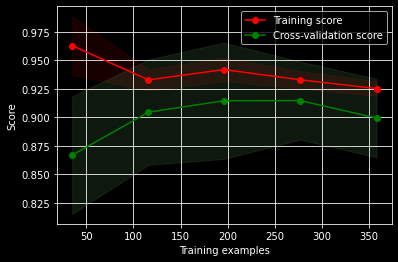

In [5]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r"
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="lightgreen"
)
plt.plot(
    train_sizes,
    train_scores_mean,
    'o-',
    color="r",
    label="Training score"
)
plt.plot(
    train_sizes,
    test_scores_mean,
    'o-',
    color="g",
    label="Cross-validation score"
)
plt.legend(loc="best")
plt.show()
